In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [3]:
# Loading data
df = pd.read_csv("Resources/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,6.0
1,0.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
2,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,8.0
3,0.0,1.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,30.0,1.0,1.0,11.0,6.0,7.0
4,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,8.0


In [4]:
# Define features set
X = df.copy()
X.drop("Diabetes_binary", axis=1, inplace=True)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,6.0
1,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,11.0,6.0,8.0
2,1.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,8.0
3,1.0,1.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,30.0,1.0,1.0,11.0,6.0,7.0
4,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,5.0,8.0


In [5]:
# Define target vector
y = df["Diabetes_binary"].ravel()
y[:5]

array([0., 0., 0., 0., 0.])

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [9]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [10]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=16)

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6128,2704
Actual 1,2044,6797


Accuracy Score : 0.7313415945227183
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      8832
         1.0       0.72      0.77      0.74      8841

    accuracy                           0.73     17673
   macro avg       0.73      0.73      0.73     17673
weighted avg       0.73      0.73      0.73     17673



In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1703795787657389, 'BMI'),
 (0.12655372222415479, 'Age'),
 (0.10684680280455687, 'GenHlth'),
 (0.08378610362368206, 'Income'),
 (0.07385991006055441, 'HighBP'),
 (0.06940569394019888, 'PhysHlth'),
 (0.05751328068758684, 'Education'),
 (0.05210942555041941, 'MentHlth'),
 (0.041066894916398804, 'HighChol'),
 (0.02916222245288273, 'Smoker'),
 (0.028487815238727034, 'Fruits'),
 (0.02664732557203347, 'Sex'),
 (0.026599072907249516, 'DiffWalk'),
 (0.02293141601667911, 'PhysActivity'),
 (0.022205528860795354, 'Veggies'),
 (0.018444835508779397, 'HeartDiseaseorAttack'),
 (0.01226395613748818, 'NoDocbcCost'),
 (0.010063205343105912, 'Stroke'),
 (0.008862795353844396, 'HvyAlcoholConsump'),
 (0.007646449569667187, 'AnyHealthcare'),
 (0.005163964465456817, 'CholCheck')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

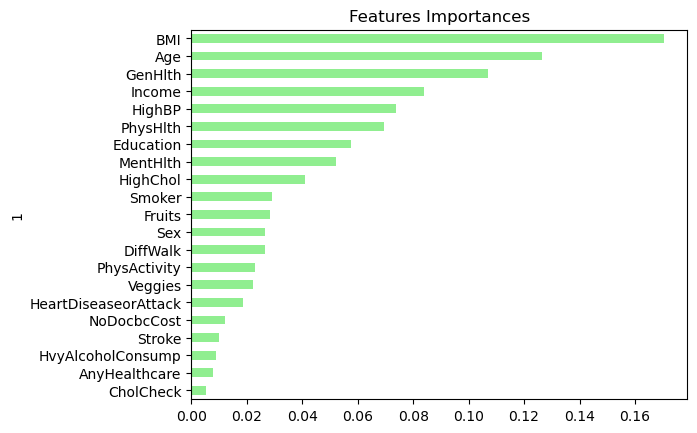

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)